

#Desafio Codenation



Importando Bibliotecas

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
from IPython.display import Image 
from sklearn.model_selection import train_test_split

Lendo Arquivos

In [0]:
url_teste = 'https://github.com/OLucasAlves/desafio-codenation/raw/master/test.csv'

url_treino = 'https://github.com/OLucasAlves/desafio-codenation/raw/master/train.csv'

treino = pd.read_csv(url_treino)
teste = pd.read_csv(url_teste)

In [5]:
#Exibindo uma amostra dos dados de teste
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [6]:
#Exibindo uma amostra dos dados de treino
treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [0]:
#Criando um DataFrame com os dados de Treino, pegamosapenas algumas colunas do Dataset para gerar o outro
treino_dados = treino[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

In [9]:
#Exibindo uma amostra dos dados que vamos uasr para treinar nosso modelo 
treino_dados.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,436.3,495.4,581.2,399.4,520.0
1,474.5,544.1,599.0,459.8,580.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [10]:
#Analisando correlação das nossas váriaveis
treino_dados.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.609543,0.545667,0.584941,0.459938
NU_NOTA_CH,0.609543,1.000000,0.692988,0.529594,0.550582
NU_NOTA_LC,0.545667,0.692988,1.000000,0.494695,0.512908
NU_NOTA_MT,0.584941,0.529594,0.494695,1.000000,0.379376
NU_NOTA_REDACAO,0.459938,0.550582,0.512908,0.379376,1.000000


In [11]:
#Analisando número de linhas e colunas do nossos datasets
treino_dados.shape,teste.shape

((13730, 5), (4576, 47))

In [0]:
#Retirando do Dataset os valores NaN das notas
treino_dados  = treino_dados.replace(0, np.NaN).dropna(how='all').fillna(0)
teste   = teste.replace(0, np.NaN).dropna(how='all').fillna(0)

In [13]:
#Analisando o impactando no nosso número de linhas
treino_dados.shape,teste.shape

((10375, 5), (4576, 47))

In [0]:
#Separando nossas Features de treino ('NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO') e Alvo ('NU_NOTA_MT')
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
coluna_label = ['NU_NOTA_MT']

In [0]:
#Dividindo o dataset treino_dados em 2, o dataset de treino e teste
X_treino,X_teste,Y_treino,Y_teste = train_test_split(treino_dados[coluna_features].to_numpy(),treino_dados[coluna_label].to_numpy())

In [16]:
#Vendo quantas linhas em cada dataset 
X_treino.shape,X_teste.shape,Y_treino.shape,Y_teste.shape


((7781, 4), (2594, 4), (7781, 1), (2594, 1))

In [17]:
#Modelo escolhido para treinar
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

modelo = GradientBoostingRegressor(loss='ls',  learning_rate=0.1, subsample=0.1 )
modelo.fit(X_treino, Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
#Realizando predição e checando no mean_squared_error
modelo_predicoes = modelo.predict(X_teste)
avaliacao = mean_squared_error(Y_teste, modelo_predicoes)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")

Minha avaliação nos dados de teste foi de 5546.778878679868


In [0]:
#Atribuindo nosso modelo para prever as notas de MAT no nosso dataset teste
MODELO = modelo
X_desafio = teste[coluna_features].to_numpy()
predicao_desafio = MODELO.predict(X_desafioqt)

In [21]:
#Exibindo nosso array de previsões
predicao_desafio

array([432.50375538, 445.49819032, 603.32692249, ..., 654.09153838,
       445.8490766 ,  -8.3145531 ])

In [0]:
#Montando nosso dataframe de envio do desafio com o número de inscrição
desafio_df = pd.DataFrame(teste.NU_INSCRICAO)

In [0]:
#Atribuindo a predição ao nosso dataframe com o nome de coluna "NU_NOTA_MT"
desafio_df ['NU_NOTA_MT'] = predicao_desafio

In [0]:
#Determinando o index do nosso Dataframe
desafio_df.set_index("NU_INSCRICAO",inplace=True)

In [0]:
#GErando o arquivo a ser enviado pra o teste
desafio_df.to_csv('answer.csv')

In [0]:
#Fazendo Download do arquivo gerado
files.download('answer.csv')

In [27]:
#Exibindo 10 primeiras linhas das nossas previsões
desafio_df.head(10)

,NU_NOTA_MT
NU_INSCRICAO,
73ff9fcc02f0a99919906c942c2e1a1042cdcf98,432.503755
71a95f9f1b91a82c65ad94abbdf9f54e6066f968,445.498190
b38a03232f43b11c9d0788abaf060f7366053b6d,603.326922
70b682d9a3636be23f6120fa9d6b164eb3c6002d,-8.314553
715494628a50142ce8cb17191cfe6d0f3cae0934,551.461218
e656d6bad65c93fb2880f1eba5037008c8e75774,484.470011
465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,516.891393
11539e86171bf07d3a36f09377d7f54ebcc8406a,436.292999
043c544a2104aa8a9849f1a703a08d37a2f16839,487.346949


![desafio](https://drive.google.com/uc?1R5iYvnZTPHeFHaLWdFU5If_1CKHdBu7I)

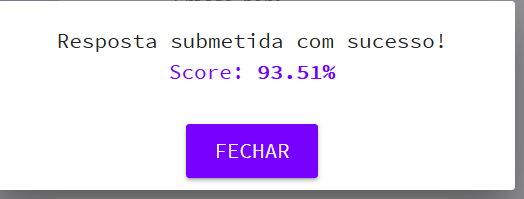

In [33]:
#Score do desafio
Image('desafio.png')